In [1]:
!pip install wordcloud
import pandas as pd
import numpy as np 
from PIL import Image 
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header = ['id', 'pubdate', 'pubtime', 'title', 'tag', 'theme', 'null']

In [3]:
df = pd.read_csv('/content/drive/MyDrive/FH_data/baikaldaily_all_sorted.csv', sep =';', error_bad_lines=False, names=header) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = df.drop(columns=['null'])

In [5]:
df = df[df['pubdate']!='None']

In [6]:
tags = df['tag'].unique()

In [7]:
#уникальные теги за десять лет
len(tags)

8103

In [8]:
alltimefreq = df.groupby('tag')['id'].nunique()

In [9]:
alltimethemefreq = df.groupby('theme')['id'].nunique()

In [10]:
alltimethemefreq

theme
Бизнес            7984
Власть           19267
ДТП                  1
Общество        102454
Происшествия     71461
Экономика        13863
Name: id, dtype: int64

In [11]:
y = np.array(list([alltimethemefreq[0], alltimethemefreq[1], alltimethemefreq[3], alltimethemefreq[4], alltimethemefreq[5]]))
x = np.array(list([alltimethemefreq.index[0], alltimethemefreq.index[1], alltimethemefreq.index[3], alltimethemefreq.index[4], alltimethemefreq.index[5]]))

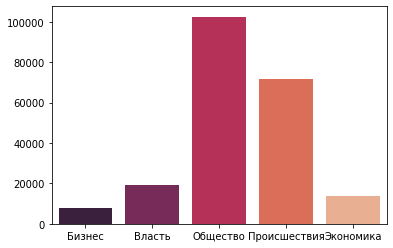

In [12]:
ax1 = sns.barplot(x=x, y=y, palette="rocket")

In [13]:
alltimefreq

tag
 погибла девушка               1
1 мая                          1
1 сентября                     1
10 рублей                      1
100 лет Республики Бурятия     2
                              ..
яхтенный спорт                 7
яхты                          12
ящур                          31
ёлка                          11
ёхор                          19
Name: id, Length: 8102, dtype: int64

In [62]:
max(alltimefreq)

10327

In [98]:
alltimefreq.sort_values(ascending=False)[:20]

tag
ДТП                  10327
спорт                 9558
кража                 6856
пожар                 6595
смерть                5176
Байкал                4736
убийство              4237
суд                   3685
прокуратура           3668
конкурс               3123
наркотики             2788
коронавирус           2756
лесные пожары         2679
прогноз погоды        2568
уголовное дело        2533
мошенничество         2521
судебные приставы     2301
туризм                2208
ГИБДД                 2022
Бурятия               1908
Name: id, dtype: int64

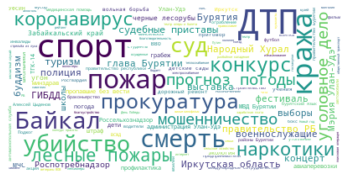

In [14]:
wc = WordCloud(background_color="white", max_font_size=40)
wc.generate_from_frequencies(alltimefreq)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

(-0.5, 2499.5, 1343.5, -0.5)

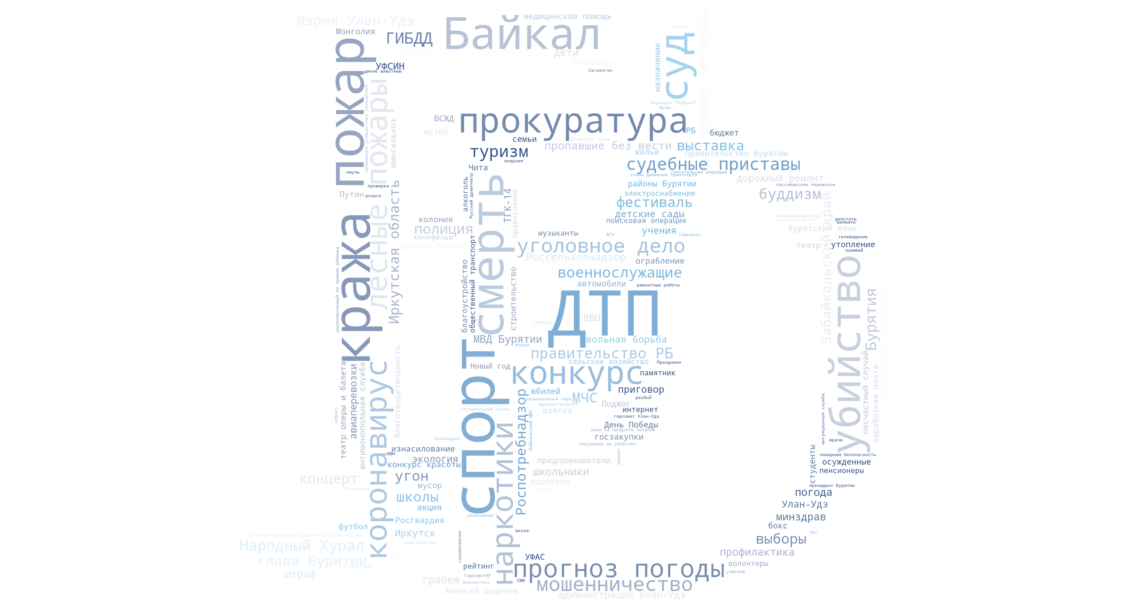

In [15]:
mask = np.array(Image.open("/content/drive/MyDrive/FH_data/baikal-daily-logo_1500_2.png"))
image_colors = ImageColorGenerator(mask)
wc = WordCloud(background_color="white", min_font_size=2, mask=mask, contour_color='black', contour_width=0)
wc.generate_from_frequencies(alltimefreq)
# show

plt.figure(figsize=(20,20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [16]:
df['datetime'] = pd.to_datetime(df['pubdate']+' '+df['pubtime'])

In [17]:
df['month'] = pd.DatetimeIndex(df['datetime']).month

In [20]:
df['year'] = pd.DatetimeIndex(df['datetime']).year

In [114]:
df.head()

,id,pubdate,pubtime,title,tag,theme,datetime,month,year,startday,covid
0,4005,2009-11-20,09:20:00,Профицит бюджета Бурятии за 10 месяцев 2009 го...,бюджет,Экономика,2009-11-20 09:20:00,11,2009,2009-11-01,False
1,4005,2009-11-20,09:20:00,Профицит бюджета Бурятии за 10 месяцев 2009 го...,профицит,Экономика,2009-11-20 09:20:00,11,2009,2009-11-01,False
3,4007,2009-11-20,09:42:00,Суд аннулировал контракт между горздравом Улан...,аптеки,Бизнес,2009-11-20 09:42:00,11,2009,2009-11-01,False
4,4007,2009-11-20,09:42:00,Суд аннулировал контракт между горздравом Улан...,лекарственные препараты,Бизнес,2009-11-20 09:42:00,11,2009,2009-11-01,False
5,4007,2009-11-20,09:42:00,Суд аннулировал контракт между горздравом Улан...,завышение цен,Бизнес,2009-11-20 09:42:00,11,2009,2009-11-01,False


In [113]:
df['covid'] = df["title"].str.contains("коронавирус|SARS-CoV-2|Коронавирус|ковид|covid-19|Covid-19|covid", na=False)

In [50]:
dtplineplot = df[df['tag']=='ДТП'].groupby(['startday'])['id'].count()

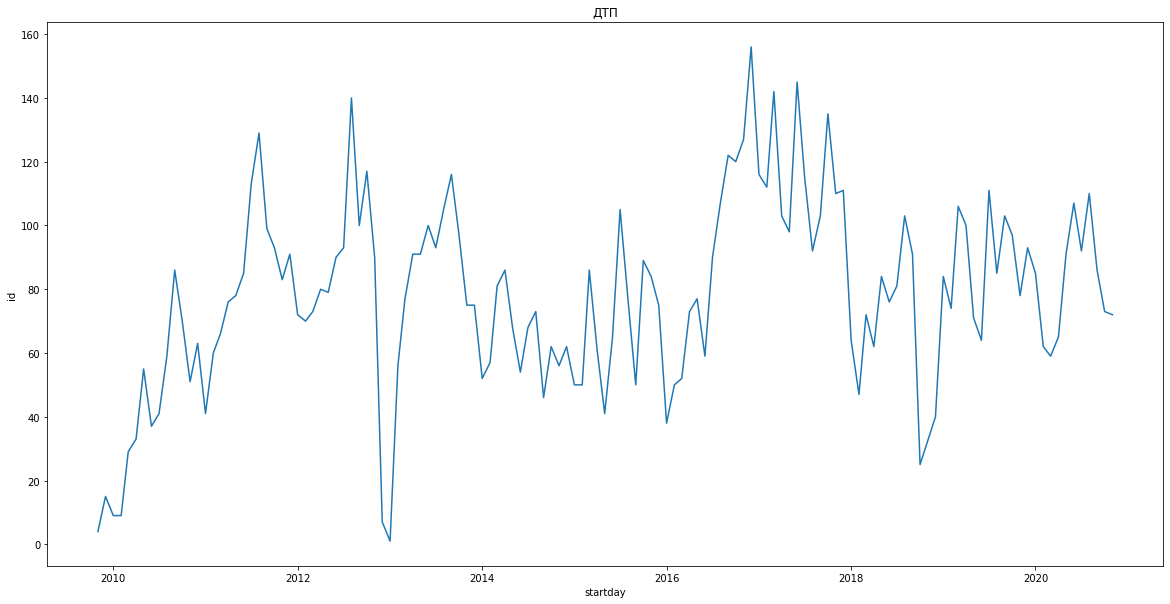

In [66]:
plt.figure(figsize=(20,10))
sns.lineplot(data=dtplineplot, markers=True)
plt.xticks()
plt.title('ДТП')
plt.show()

In [60]:
sportlineplot = df[df['tag']=='спорт'].groupby(['startday'])['id'].count()

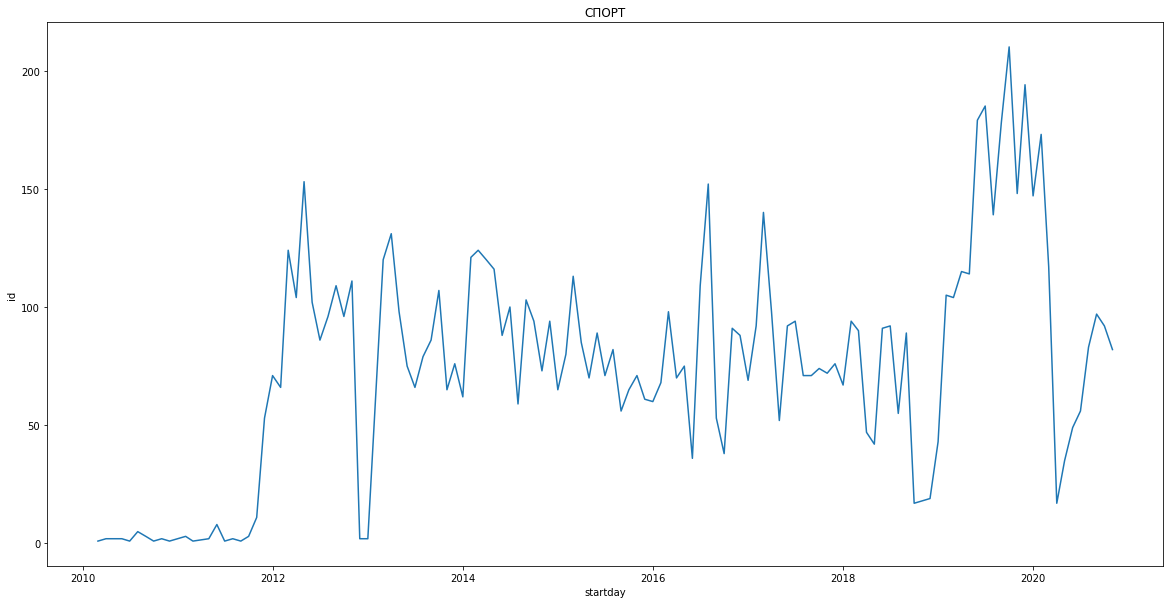

In [62]:
sportlineplot = df[df['tag']=='спорт'].groupby(['startday'])['id'].count()
plt.figure(figsize=(20,10))
sns.lineplot(data=sportlineplot)
plt.xticks()
plt.title('СПОРТ')
plt.show()

In [88]:
[thieflineplot.index[i] for i in range(len(thieflineplot.index)) if i%2==0]  

[datetime.date(2009, 11, 1),
 datetime.date(2010, 2, 1),
 datetime.date(2010, 4, 1),
 datetime.date(2010, 6, 1),
 datetime.date(2010, 8, 1),
 datetime.date(2010, 10, 1),
 datetime.date(2010, 12, 1),
 datetime.date(2011, 2, 1),
 datetime.date(2011, 4, 1),
 datetime.date(2011, 6, 1),
 datetime.date(2011, 8, 1),
 datetime.date(2011, 10, 1),
 datetime.date(2011, 12, 1),
 datetime.date(2012, 2, 1),
 datetime.date(2012, 4, 1),
 datetime.date(2012, 6, 1),
 datetime.date(2012, 8, 1),
 datetime.date(2012, 10, 1),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 4, 1),
 datetime.date(2013, 6, 1),
 datetime.date(2013, 8, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 12, 1),
 datetime.date(2014, 2, 1),
 datetime.date(2014, 4, 1),
 datetime.date(2014, 6, 1),
 datetime.date(2014, 8, 1),
 datetime.date(2014, 10, 1),
 datetime.date(2014, 12, 1),
 datetime.date(2015, 2, 1),
 datetime.date(2015, 4, 1),
 datetime.date(2015, 6, 1),
 datetime.date(2015, 8, 1),
 datetime.date(2015, 10, 1),
 datetime

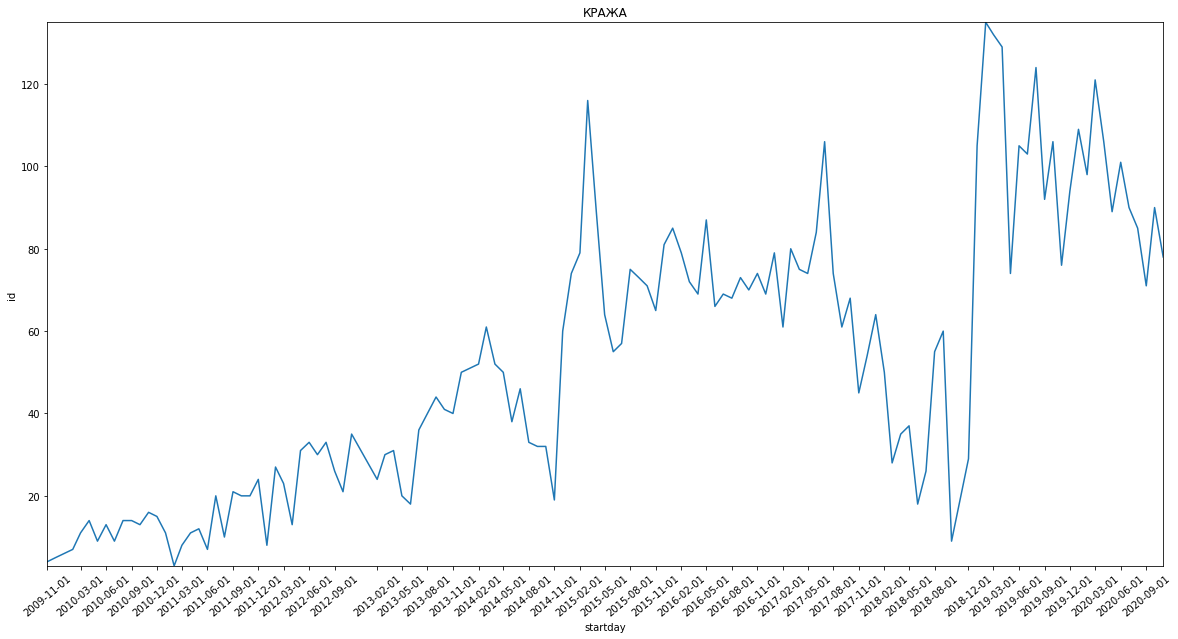

In [96]:
thieflineplot = df[df['tag']=='кража'].groupby(['startday'])['id'].count()
plt.figure(figsize=(20,10))
g = sns.lineplot( x = thieflineplot.index, y = thieflineplot, palette="rocket")
plt.xticks([thieflineplot.index[i] for i in range(len(thieflineplot.index)) if i%3==0], rotation=40)
plt.title('КРАЖА')
plt.autoscale(tight=True)
plt.show()

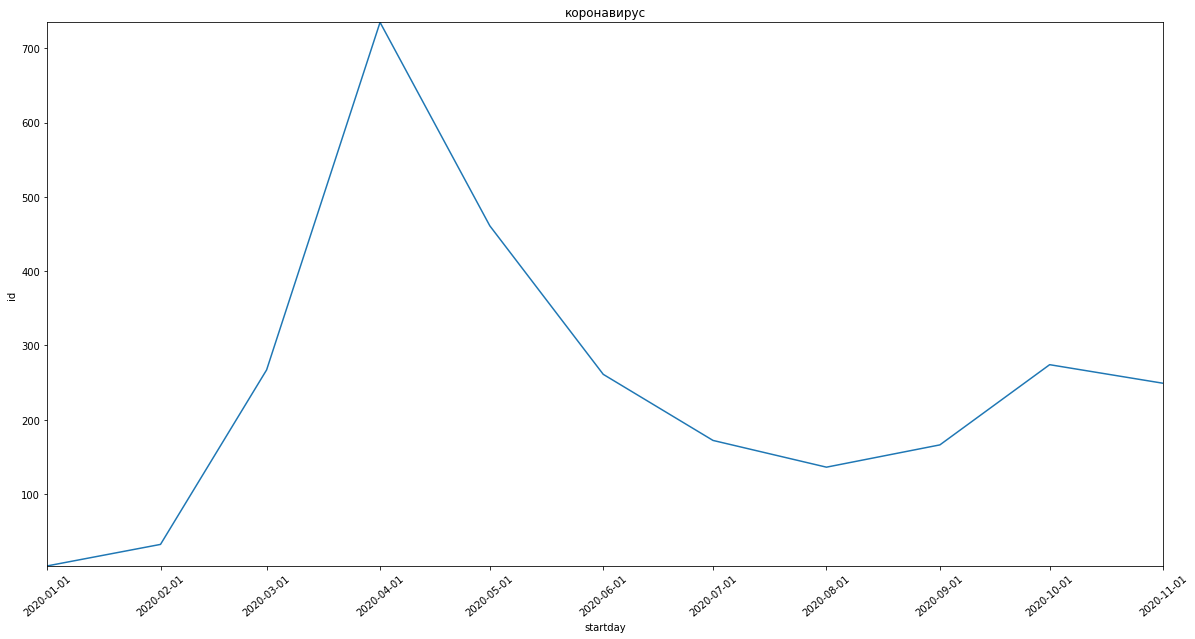

In [101]:
covlineplot = df[df['tag']=='коронавирус'].groupby(['startday'])['id'].count()
plt.figure(figsize=(20,10))
g = sns.lineplot( x = covlineplot.index, y = covlineplot, palette="rocket")
plt.xticks([covlineplot.index[i] for i in range(len(covlineplot.index))], rotation=40)
plt.title('коронавирус')
plt.autoscale(tight=True)
plt.show()

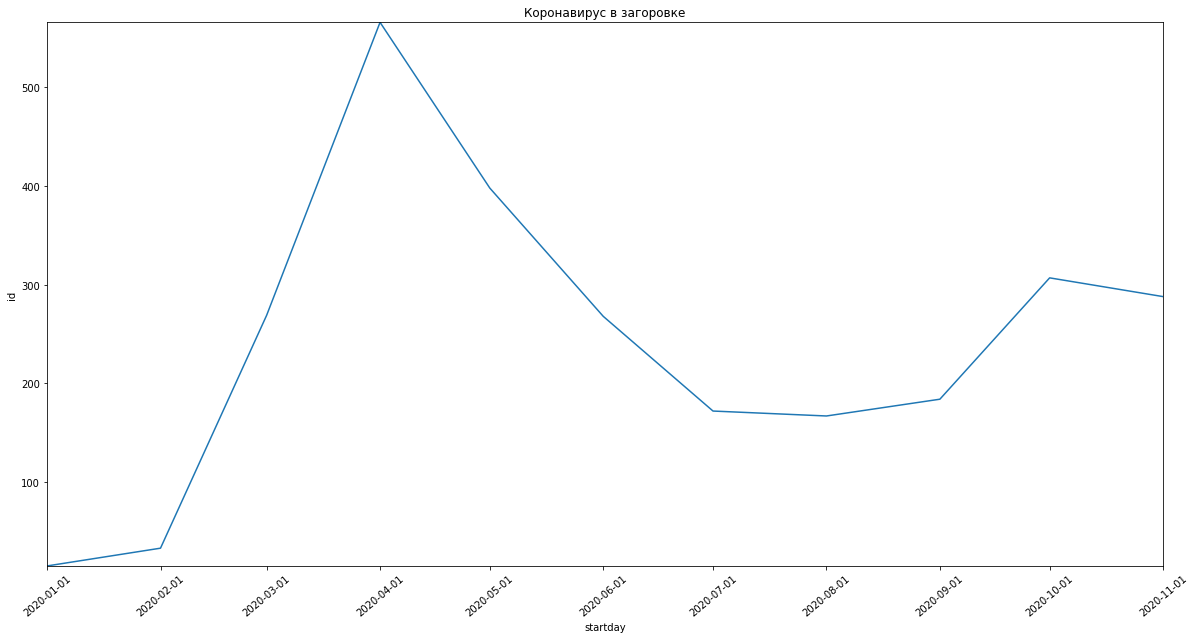

In [117]:
cov2lineplot = df[(df['covid']==True)&(df['year']>=2019)].groupby(['startday'])['id'].count()
plt.figure(figsize=(20,10))
g = sns.lineplot( x = cov2lineplot.index, y = cov2lineplot, palette="rocket")
plt.xticks([cov2lineplot.index[i] for i in range(len(cov2lineplot.index))], rotation=40)
plt.title('Коронавирус в загоровке')
plt.autoscale(tight=True)
plt.show()

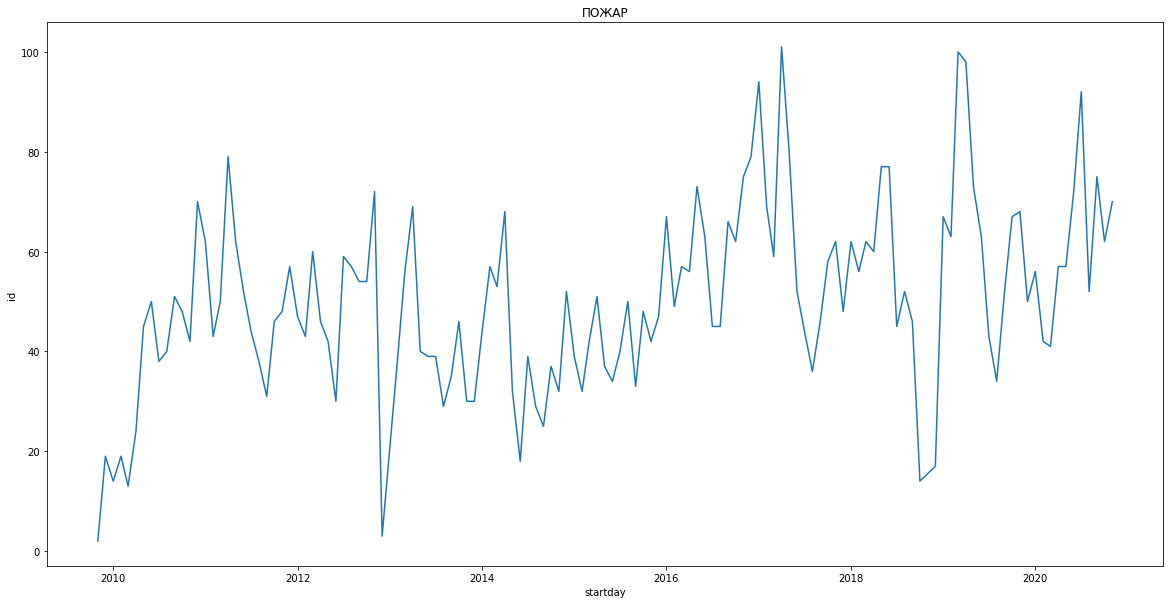

In [64]:
firelineplot = df[df['tag']=='пожар'].groupby(['startday'])['id'].count()
plt.figure(figsize=(20,10))
sns.lineplot(data=firelineplot)
plt.xticks()
plt.title('ПОЖАР')
plt.show()

In [45]:
df[] = (df['datetime'] - pd.offsets.MonthEnd() + pd.offsets.MonthBegin()).dt.date

In [146]:
tagstimeline = pd.DataFrame(columns=[tags])

In [137]:
poptags = alltimefreq.sort_values(ascending=False)[:30].index.to_list()

In [138]:
cols

Index(['ДТП', 'спорт', 'кража', 'пожар', 'смерть', 'Байкал', 'убийство', 'суд',
       'прокуратура', 'конкурс', 'наркотики', 'коронавирус', 'лесные пожары',
       'прогноз погоды', 'уголовное дело', 'мошенничество',
       'судебные приставы', 'туризм', 'ГИБДД', 'Бурятия'],
      dtype='object', name='tag')

In [140]:
popular30 = df[df['tag'].isin(poptags)]

In [153]:
popular30_transpose = popular30.groupby(['startday', 'tag'])['id'].count()

In [164]:
popular30_transpose

startday    tag              
2009-11-01  Байкал                1
            Бурятия               1
            ГИБДД                 1
            ДТП                   4
            Иркутская область     1
                                 ..
2020-11-01  судебные приставы     9
            туризм               18
            убийство             23
            уголовное дело        2
            фестиваль            18
Name: id, Length: 3485, dtype: int64

In [218]:
pop30 = popular30_transpose.to_frame()

In [219]:
pop30 = pop30.unstack()

In [220]:
pop30 = pop30.fillna(0)

In [225]:
pop30.columns = pop30.columns.droplevel()

In [230]:
pop30.index

Index([2009-11-01, 2009-12-01, 2010-01-01, 2010-02-01, 2010-03-01, 2010-04-01,
       2010-05-01, 2010-06-01, 2010-07-01, 2010-08-01,
       ...
       2020-02-01, 2020-03-01, 2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01,
       2020-08-01, 2020-09-01, 2020-10-01, 2020-11-01],
      dtype='object', name='startday', length=132)

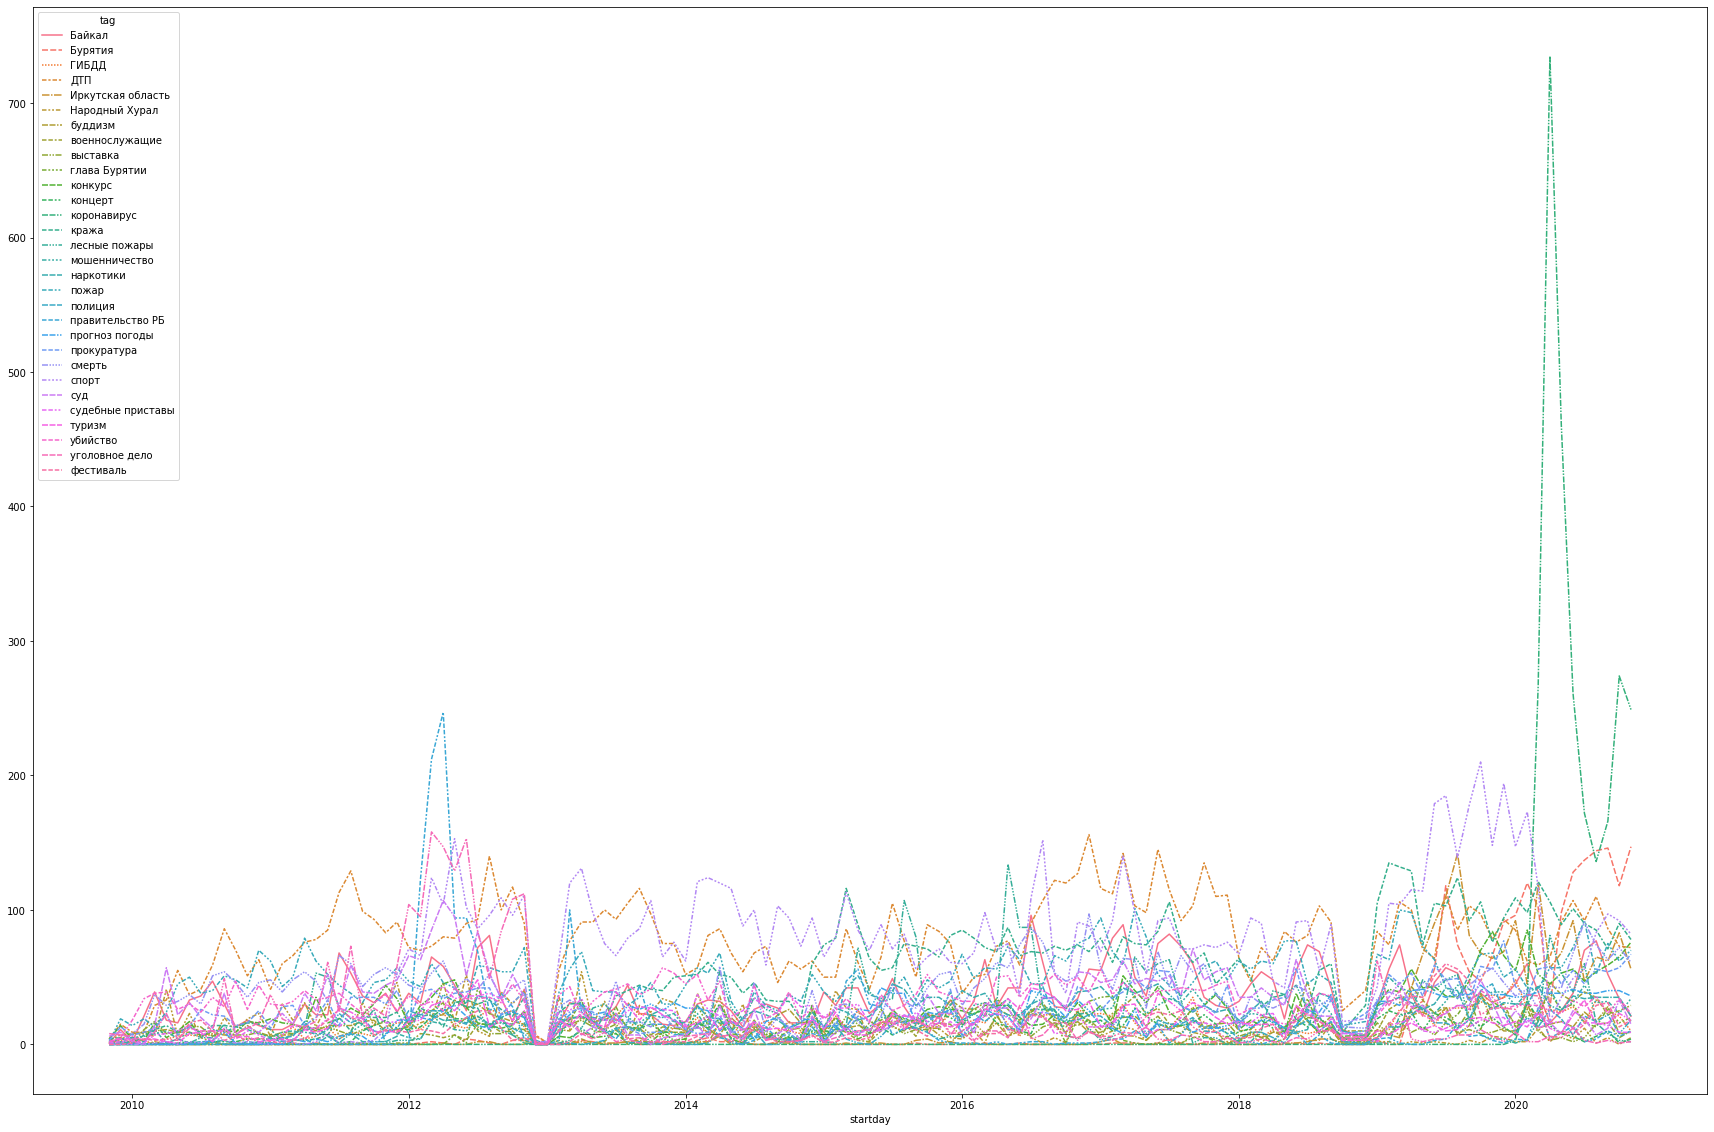

In [233]:
plt.figure(figsize=(30,20))
sns.lineplot(data=pop30)
plt.xticks([thieflineplot.index[i] for i in range(len(thieflineplot.index)) if i%3==0], rotation=40)
plt.title('Невероятное веселье')
